> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 4.2 - APIs


## Exercícios 🔭🌌🪐

Vamos acessar as APIs da NASA para ver algumas imagens interessantes capturadas universo afora!

#### Q1.
Crie uma chave no site oficial:
* https://api.nasa.gov

Vamos armazenar a chave de forma segura! <br>
Salve a sua chave em um arquivo `key.json` na forma:
`API_KEY=SUA_CHAVE`

Adicione o nome do arquivo `key.json` ao `.gitignore` do repositório que você fará upload da atividade.
Para isso basta abrir o arquivo `.gitignore` na pasta raíz do repositório (ou criar um caso ele não exista). Dentro do arquivo, apenas adiciona o nome do arquivo que deseja ignorar.

#### Q2. 🛰 Astronomy Picture of the Day (APOD) 🌌
> Antes de fazer os exercícios, devo te lembrar que existem limites de acesso às APIs, descritas na página principal, portanto pega leve na tentativa e erro na hora de testar seu código.

<img width=500 src=https://apod.nasa.gov/apod/image/2407/M24-HaLRGB-RC51_1024.jpg>

A primeira API que acessaremos é a mais popular de todas: astronomy picture of the day (foto astronômica do dia).

Faça uma requisição GET para a URL da API que retorna a imagem do dia! Essa é fácil já que são os valores padrão da rota principal:
* URL base: `'https://api.nasa.gov/planetary/apod'`
* Endpoint: não precisa preencher, acessaremos a raíz da API.
* Query params: preencha `api_key` com a sua chave de autenticação. Se animar mexer em outros parâmetros veja [a documentação](https://api.nasa.gov).

Ao receber a resposta (um json), você deve:
* Imprimir os campos `copyright` e `explanation`
* Com as biblioteca scikit-images e matplotlib, apresente a imagem a partir do campo `url` ou `hdurl`, e preencha o título do plot com o campo `title` do json. Uma dica de código a seguir.
```python
from skimage import io
img = io.imread(url)
## plot a matriz img com matplotlib (imshow)
```   

Copyright: 
Ogetay Kayali
(Michigan Tech U.)
Text: 
Ogetay Kayali
(Michigan Tech U.)

Explanation: If you have looked at the sky and seen a group of stars about the size of the full Moon, that's the Pleiades (M45). Perhaps the most famous star cluster in the sky, its brightest stars can be seen even from the light-polluted cities. But your unaided eye can also see its nebulosity -- the gas and dust surrounding it -- under dark skies. However, telescopes can catch even more. The bright blue stars of the Pleiades, also known as the Seven Sisters, light up their surrounding dust, causing it to appear a diffuse blue that can only be seen under long exposures. But that's not all. The cosmic dust appears to stretch upward like ethereal arms. And the entire structure is surrounded by a reddish glow from the most abundant element in the universe: hydrogen. The featured image is composed of nearly 25 hours of exposure and was captured last year from Starfront Observatory, in Texas, USA  Explore

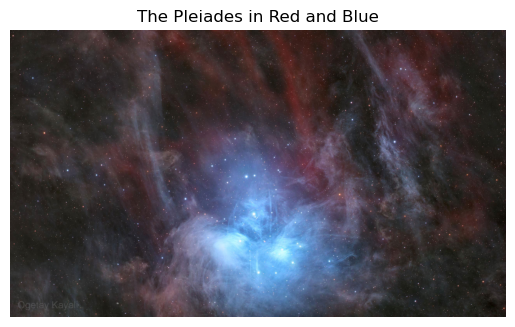

In [1]:
import json
import requests
from skimage import io
import matplotlib.pyplot as plt

with open('key.json', 'r') as fp:
    auth = json.load(fp)

api_key = auth['API_KEY']

url = 'https://api.nasa.gov/planetary/apod'

params = {
    'api_key': api_key
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()

    print("Copyright:", data.get('copyright', 'Sem informação'))
    print("Explanation:", data['explanation'])

    image_url = data.get('hdurl') or data.get('url')

    img = io.imread(image_url)

    plt.imshow(img)
    plt.axis('off')
    plt.title(data['title'])
    plt.show()

#### Q3. Limites
A partir da resposta da query anterios, imprima o header da resposta e consulte os atributos:
* X-RateLimit-Limit: o limite total de requisições da sua chave de API
* X-RateLimit-Remaining: o limite restante de requisições da sua chave de API

In [2]:
headers = response.headers

print("X-RateLimit-Limit:", headers.get('X-RateLimit-Limit', 'Não disponível'))
print("X-RateLimit-Remaining:", headers.get('X-RateLimit-Remaining', 'Não disponível'))

X-RateLimit-Limit: 2000
X-RateLimit-Remaining: 1986


### Q4. Mars Rover Photos 🚀🚙 📷

<img width=500 src=https://www.nasa.gov/wp-content/uploads/2019/10/pia23378-16.jpg>

Essa API retorna dados (incluindo imagens capturadas) sobre os veículos que hoje habitam o planeta Marte. São os rovers `opportunity`, `spirit` e o mais famoso, o `curiosity` (da foto acima).

Antes de requisitar imagens, vamos ver o relatório de dados coletados por um deles, o `curiosity`. Isso vai nos ajudar a montar a query de imagens coletadas.

Faça uma requisição GET para a seguinte URL:
* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* endpoint: `'/manifests/{nome_do_rover}'`
* query parameters: preencha `api_key` com a sua chave de autenticação.

Extraia o json da resposta retornada. O campo principal é o `'photo_manifest'`, do qual queremos acessar os seguintes valores:
* `max_sol`: Máximo "dia marciano" de coleta de fotos. O dia marciano tem 24 horas, 39 minutos e 35 segundos.
* `max_date`: Última data terrestre de coleta de fotos, na forma `'aaaa-mm-dd'`.

Imprima esses dois atributos da resposta e os use no próximo exercício para coletar as fotos mais recentes tiradas. 

In [3]:
url = 'https://api.nasa.gov/mars-photos/api/v1/manifests/curiosity'
params = {'api_key': api_key}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    manifest = data['photo_manifest']

    max_sol = manifest['max_sol']
    max_date = manifest['max_date']

    print("Último sol (max_sol):", max_sol)
    print("Última data terrestre (max_date):", max_date)

Último sol (max_sol): 4592
Última data terrestre (max_date): 2025-07-07


#### Q5.

Faça uma requisição GET para a URL da API que retorna links para as imagens coletadas pelos rovers.

* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* Endpoint: `/rovers/{nome_do_rover}/photos`
* Query params sugeridos: 
    * `api_key`: sua chave de autenticação.
    * `sol`: dia marciano que deseja coletar (de 0 a `max_sol` coletado anteriormente)
    * `page`: você pode paginar entre as respostas! São retornados 25 resultados por página.

A resposta esperada estará no formato a seguir, uma lista no campo `'photos'` onde cada item é um dicionário com os dados da foto tirada. Dentre os dados há o campo `camera` indicando qual das câmeras do rover tirou a foto. As fotos mais interessantes (na minha opinião, claro) são das câmeras de navegação (`"name": "NAVCAM"`) e as de prevenção de colisão (frente: `"name": "FHAZ"` e trás `"name": "RHAZ"`) onde dá pra ver partes do robô!

**Seu trabalho é**:
* Paginar a requisição acima até que a resposta seja `None`
* Escolher uma ou mais câmeras (ex: `NAVCAM`, `FHAZ`, `RHAZ`), e em um laço de repetição plotar todas as imagens retornadas daquela câmera. Use novamente as bibliotecas scikit-image e matplotlib. 
  * O título da imagem deve ter a página da requisição, nome da câmera e id da imagem.

```json
{
  "photos": [
    {
      "id": 1228212,
      "sol": 4102,
      "camera": {
        "id": 20,
        "name": "FHAZ",
        "rover_id": 5,
        "full_name": "Front Hazard Avoidance Camera"
      },
      "img_src": "https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/04102/opgs/edr/fcam/FLB_761645828EDR_F1060660FHAZ00302M_.JPG",
      "earth_date": "2024-02-19",
      "rover": {
        "id": 5,
        "name": "Curiosity",
        ...
      }
    }
    {
      "id": 1228213,
      "sol": 4102, 
      ...
    }
```




Página 1 - 2 fotos encontradas


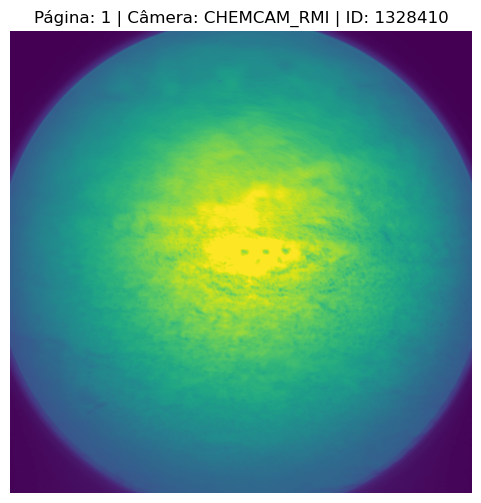

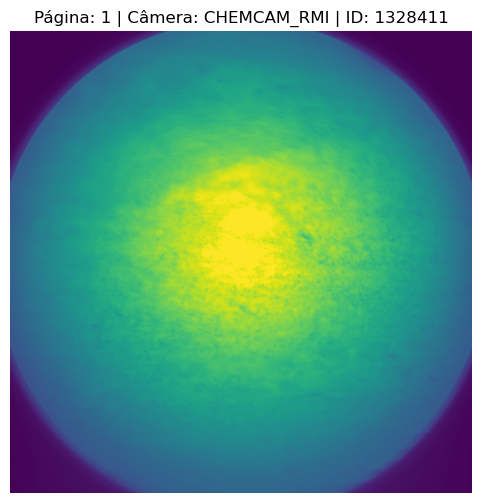

Não há mais fotos para mostrar.


In [4]:
base_url = 'https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos'
max_sol = 4592
page = 1

while True:
    params = {
        'api_key': api_key,
        'sol': max_sol,
        'page': page
        #'camera': 'NAVCAM' ## comentei essa linha porque não retornou nenhuma imagem
    }

    response = requests.get(base_url, params=params)
    if response.status_code != 200:
        print(f"Erro na requisição, status: {response.status_code}")
        break

    data = response.json()
    photos = data['photos']

    if not photos:
        print("Não há mais fotos para mostrar.")
        break

    print(f"\nPágina {page} - {len(photos)} fotos encontradas")

    for photo in photos:
        img_url = photo['img_src']
        img_id = photo['id']
        camera_name = photo['camera']['name']

        try:
            img = io.imread(img_url)
            plt.figure(figsize=(6, 6))
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Página: {page} | Câmera: {camera_name} | ID: {img_id}")
            plt.show()
        except Exception as e:
            print(f"Erro ao carregar imagem {img_id}: {e}")

    page += 1